<a href="https://colab.research.google.com/github/michaelchapa/dataMining_moreClustering_kMeans_DBSCAN_Agglomerative/blob/master/moreClustering_kMeans_DBSCAN_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

def kMeans(data):
    # plot to see the data
    plt.figure(0)
    plt.scatter(data['x'], data['y'])
    plt.title('quick look at data point distribution')
    plt.show()
    
    # Run 2-Means algorithm
    fig = plt.figure(1, figsize = (16, 12))
    ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)
    
    estimator = KMeans(n_clusters = 2)
    estimator.fit(data)
    labels = estimator.labels_
    ax.scatter(data['x'], data['y'], c = labels.astype(np.float), edgecolor = 'k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.dist = 12
    
    fig.show()
    
    # Run 3-Means algorithm
    fig = plt.figure(2, figsize = (16, 12))
    ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)
    
    estimator = KMeans(n_clusters = 3)
    estimator.fit(data)
    labels = estimator.labels_
    ax.scatter(data['x'], data['y'], c = labels.astype(np.float), edgecolor = 'k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.dist = 12
    
    fig.show()


def dbScanRun(data):
    db = DBSCAN(eps = 0.3, min_samples = 10).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # # of clusters in labels, ignoring noise if present. 
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    counts = Counter(labels)
    n_noise_ = counts[-1]
    
    print('DBSCAN: eps = 0.3, minPts = 10')
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d\n' % n_noise_)
    
    db = DBSCAN(eps = 0.5, min_samples = 5).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # # of clusters in labels, ignoring noise if present. 
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    counts = Counter(labels)
    n_noise_ = counts[-1]
    
    print('DBSCAN: eps = 0.5, minPts = 5')
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d\n' % n_noise_)

def agglomerativeRun(data):
    clustering = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean").fit(data)
    counts = Counter(clustering.labels_)
    n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    print("Agglomerative: 4 clusters, Euclidean objective fxn")
    print(counts, "\n")
    
    clustering = AgglomerativeClustering(n_clusters = 3, affinity = "l1", linkage = "complete").fit(data)
    counts = Counter(clustering.labels_)
    n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    print("Agglomerative: 3 clusters, L1 objective fxn")
    print(counts)

K-Means:
First K = 2
Second K = 3

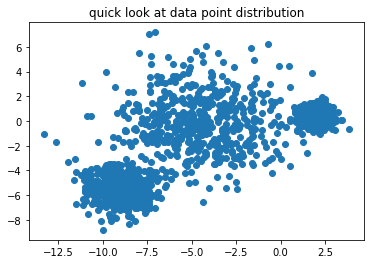

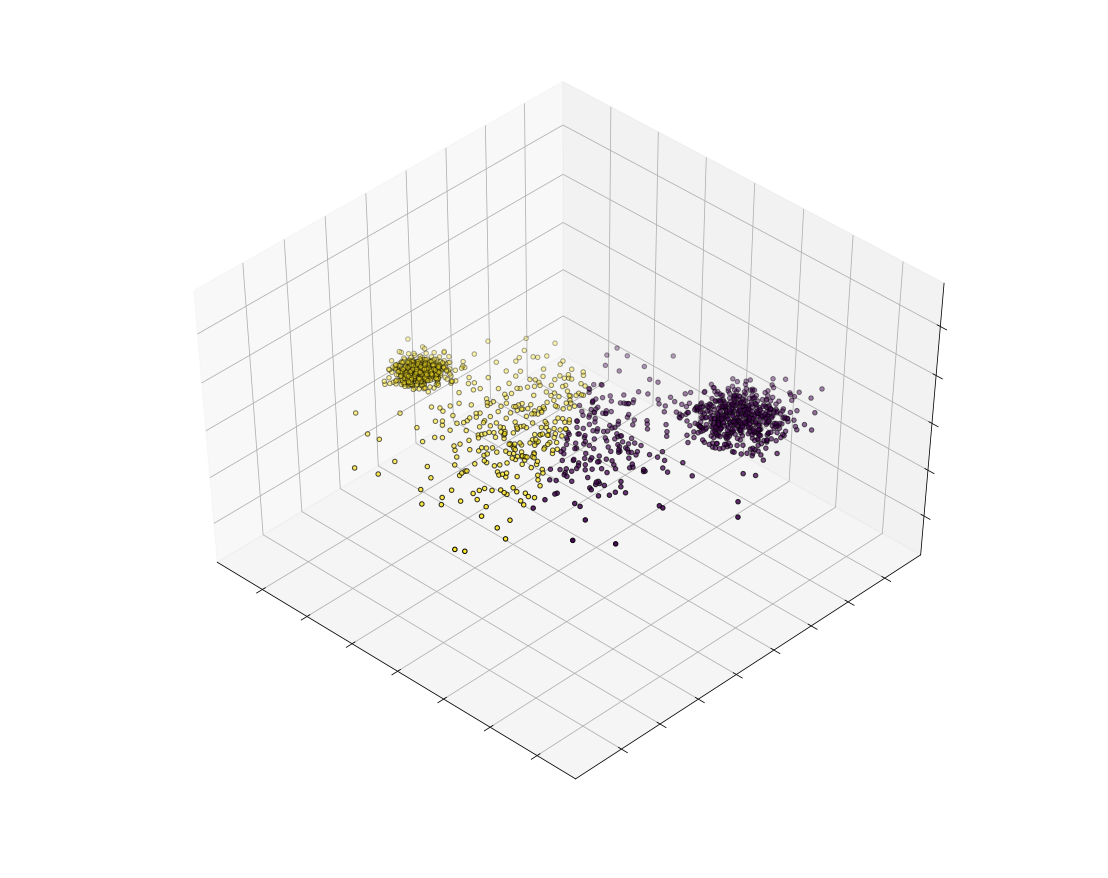

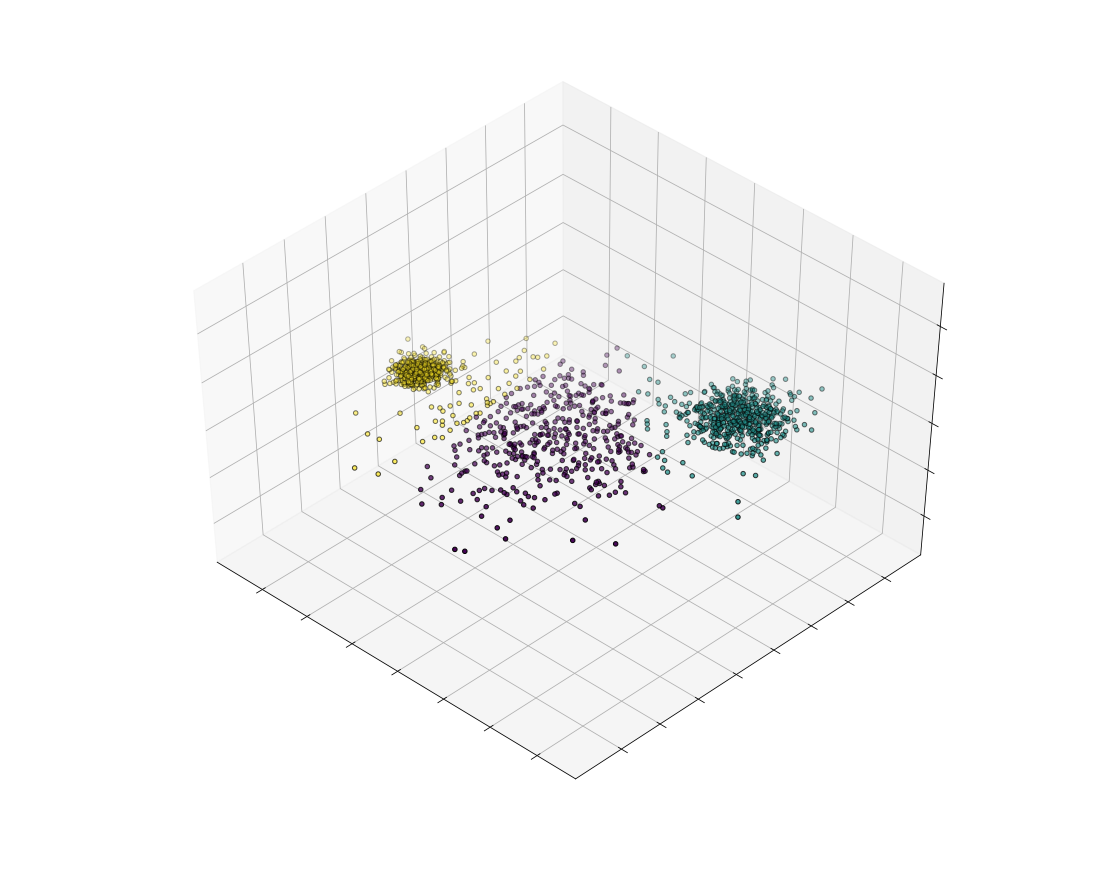

In [4]:
# Load Data into a dataFrame
data = pd.read_csv("https://raw.githubusercontent.com/michaelchapa/dataMining_moreClustering_kMeans_DBSCAN_Agglomerative/master/hwk09.csv")
kMeans(data)

DBSCAN Runs:

In [5]:
dbScanRun(data)

DBSCAN: eps = 0.3, minPts = 10
Estimated number of clusters: 3
Estimated number of noise points: 645

DBSCAN: eps = 0.5, minPts = 5
Estimated number of clusters: 8
Estimated number of noise points: 129



Agglomerative Runs:

In [6]:
agglomerativeRun(data)

Agglomerative: 4 clusters, Euclidean objective fxn
Counter({3: 510, 2: 507, 1: 280, 0: 203}) 

Agglomerative: 3 clusters, L1 objective fxn
Counter({1: 792, 0: 542, 2: 166})
